# NYC Payroll Analysis.
---

### Analysis
* 

In [327]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import Series, DataFrame
from pylab import *
import statsmodels.api as sm
from matplotlib.ticker import MaxNLocator
from scipy import stats
import math
%matplotlib inline
print('Modules are imported.')

Modules are imported.


In [328]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
# File to Load, Source: Kaggle
file_to_load = "Resources/NYC_payroll_data_fiscal_year.csv"

In [335]:
payroll_data = pd.read_csv(file_to_load)
payroll_data.head(3)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2019,67.0,ADMIN FOR CHILDREN'S SVCS,PARRIS,TAMICA,T,2019-04-08T00:00:00.000,BROOKLYN,CHILD AND FAMILY SPECIALIST,ACTIVE,70900.0,per Annum,425.0,14956.98,0.00,0.00,8.25
1,2019,67.0,ADMIN FOR CHILDREN'S SVCS,WOODS,JAHDEIRA,NaN,2015-01-05T00:00:00.000,QUEENS,CHILD PROTECTIVE SPECIALIST,ACTIVE,57070.0,per Annum,1825.0,57402.49,386.75,16478.07,2392.86
2,2019,67.0,ADMIN FOR CHILDREN'S SVCS,NAVAS,JORGE,A,1999-07-06T00:00:00.000,QUEENS,COMMUNITY ASSOCIATE,ACTIVE,46376.0,per Annum,1604.0,40986.29,0.00,0.00,1160.84


In [336]:
payroll_data.shape

(3333096, 17)

In [337]:
# Drop unnecessary data
payroll_data1= payroll_data.drop(["First Name", "Last Name", "Mid Init"], axis="columns")

In [338]:
payroll_data1.head(3)

,Fiscal Year,Payroll Number,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2019,67.0,ADMIN FOR CHILDREN'S SVCS,2019-04-08T00:00:00.000,BROOKLYN,CHILD AND FAMILY SPECIALIST,ACTIVE,70900.0,per Annum,425.0,14956.98,0.00,0.00,8.25
1,2019,67.0,ADMIN FOR CHILDREN'S SVCS,2015-01-05T00:00:00.000,QUEENS,CHILD PROTECTIVE SPECIALIST,ACTIVE,57070.0,per Annum,1825.0,57402.49,386.75,16478.07,2392.86
2,2019,67.0,ADMIN FOR CHILDREN'S SVCS,1999-07-06T00:00:00.000,QUEENS,COMMUNITY ASSOCIATE,ACTIVE,46376.0,per Annum,1604.0,40986.29,0.00,0.00,1160.84


# Data Cleaning 

In [86]:
#The info() function is used to print a concise summary of a DataFrame. 
payroll_data1.count()

Fiscal Year                   3333096
Payroll Number                1587656
Agency Name                   3333096
Agency Start Date             3333096
Work Location Borough         2826873
Title Description             3333096
Leave Status as of June 30    3333096
Base Salary                   3333096
Pay Basis                     3333096
Regular Hours                 3333096
Regular Gross Paid            3333096
OT Hours                      3333096
Total OT Paid                 3333096
Total Other Pay               3333096
dtype: int64

In [339]:
payroll_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333096 entries, 0 to 3333095
Data columns (total 14 columns):
Fiscal Year                   int64
Payroll Number                float64
Agency Name                   object
Agency Start Date             object
Work Location Borough         object
Title Description             object
Leave Status as of June 30    object
Base Salary                   float64
Pay Basis                     object
Regular Hours                 float64
Regular Gross Paid            float64
OT Hours                      float64
Total OT Paid                 float64
Total Other Pay               float64
dtypes: float64(7), int64(1), object(6)
memory usage: 356.0+ MB


In [385]:
#Data cleaning (Transform from ELT)
#payroll_data1["Title Description"].value_counts()

In [362]:
payroll_data1.nunique()

Fiscal Year                                                                6
Payroll Number                                                           157
Agency Name                                                              165
Agency Start Date                                                      14609
Work Location Borough                                                     22
Title Description                                                       1719
Leave Status as of June 30                                                 5
Base Salary                                                            82313
Pay Basis                                                                  4
Regular Hours                                                          80480
Regular Gross Paid                                                   1607815
OT Hours                                                               47922
Total OT Paid                                                         704179

In [343]:
#preparing data to clean convert to string
payroll_data1["Base Salary", "Regular Gross Paid", "Total OT Paid", "Total Other Pay"] = payroll_data1["Base Salary"].astype(str)

In [344]:
payroll_data1["Base Salary"] = payroll_data1["Base Salary"].astype(str)
payroll_data1["Regular Gross Paid"] = payroll_data1["Regular Gross Paid"].astype(str).str.strip()
payroll_data1["Total OT Paid"] = payroll_data1["Total OT Paid"].astype(str)
payroll_data1["Total Other Pay"] = payroll_data1["Total Other Pay"].astype(str)

In [345]:
# Convert "Base Salary" to Integer and rest to floats.
payroll_data1["Base Salary", "Regular Gross Paid", "Total OT Paid", "Total Other Pay"] = payroll_data1["Base Salary"].str.replace('$','')
payroll_data1["Title Description"] = payroll_data1["Title Description"].astype(str).str.strip()
payroll_data1["Pay Basis"] =  payroll_data1["Pay Basis"].str.strip()


In [347]:
#to clean non-alpha numberic characters
payroll_data1["Title Description"]= payroll_data1["Title Description"].str.replace('[^A-Za-z\s]+', '')

In [351]:
#Convert columns back to float and integers
payroll_data1["Base Salary"] = payroll_data1["Base Salary"].astype(float)
payroll_data1["Base Salary"] = payroll_data1["Base Salary"].astype(int)
payroll_data1["Regular Gross Paid"] = payroll_data1["Regular Gross Paid"].astype(float)
payroll_data1["Total OT Paid"] = payroll_data1["Total OT Paid"].astype(float)
payroll_data1["Total Other Pay"] = payroll_data1["Total Other Pay"].astype(float)
payroll_data1.head()
math.floor(1.1111)
payroll_data1.describe()

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,3.333096e+06,1.587656e+06,3.333096e+06,3.333096e+06,3.333096e+06,3.333096e+06,3.333096e+06,3.333096e+06
mean,2.016551e+03,5.788932e+02,4.246282e+04,6.689010e+02,4.174712e+04,5.897182e+01,3.267842e+03,2.096560e+03
std,1.704585e+00,2.980527e+02,4.088818e+04,8.858083e+02,3.868996e+04,1.465565e+02,8.877008e+03,5.056832e+03
min,2.014000e+03,2.000000e+00,0.000000e+00,-7.304300e+02,-7.622305e+04,-2.090000e+02,-2.649388e+04,-2.815950e+05
25%,2.015000e+03,3.000000e+02,3.300000e+01,0.000000e+00,3.890400e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.017000e+03,7.420000e+02,4.107900e+04,0.000000e+00,3.587180e+04,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.018000e+03,7.470000e+02,7.648800e+04,1.825000e+03,7.321511e+04,2.000000e+00,1.943825e+02,1.107020e+03
max,2.019000e+03,9.960000e+02,3.527630e+05,4.171430e+03,6.723089e+05,3.347500e+03,2.373897e+05,1.003558e+05


# Analysis and Visualizatons 

In [366]:
payroll_data1["Fiscal Year"].unique() 

array([2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [352]:
annual_pay = payroll_data1[(payroll_data1["Pay Basis"] == "per Annum")]

In [353]:
# Subset of Data,to avoid negative values and zeros. 
x = annual_pay[(annual_pay["Regular Gross Paid"] > 10000) & (annual["Base Salary"] > 10000)]

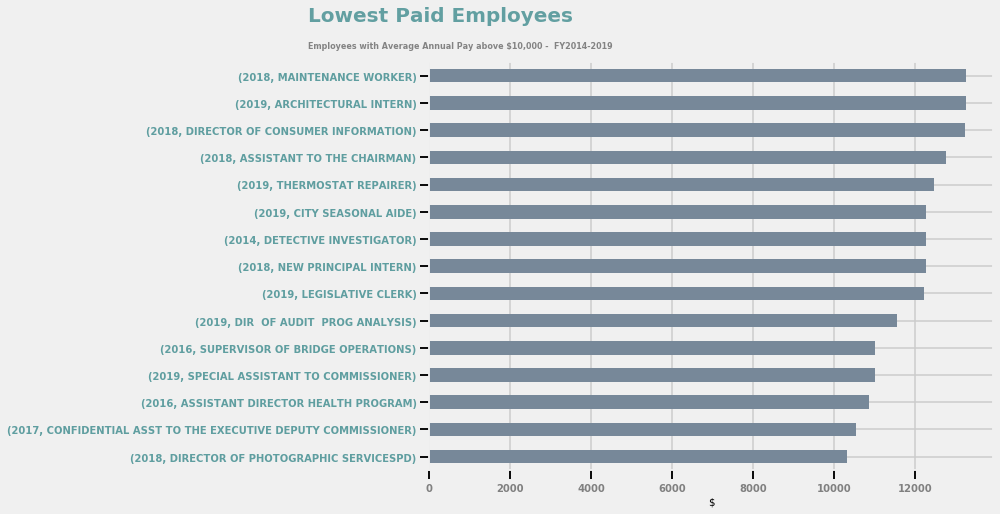

In [409]:
# Visualization for lowest paid employees
x.groupby(["Fiscal Year","Title Description"])["Regular Gross Paid"].mean().sort_values(ascending=True)[:15].plot(kind='barh',color='lightslategray')
plt.xticks(fontsize=10, color="gray", weight="bold")
plt.yticks(fontsize=10, color="cadetblue",weight="bold")
plt.ylabel('')
plt.xlabel('$',fontsize=10)
plt.rcParams['figure.figsize']= 9,7
plt.text(x=-3000, y=16, s="Lowest Paid Employees", fontsize=20, weight="bold",color="cadetblue",alpha=.98)
plt.text(x=-3000, y=15, s="Employees with Average Annual Pay above $10,000 -  FY2014-2019",fontsize=8, weight="bold",alpha=.45)
plt.savefig('output/lowest_Paid_employees.png')

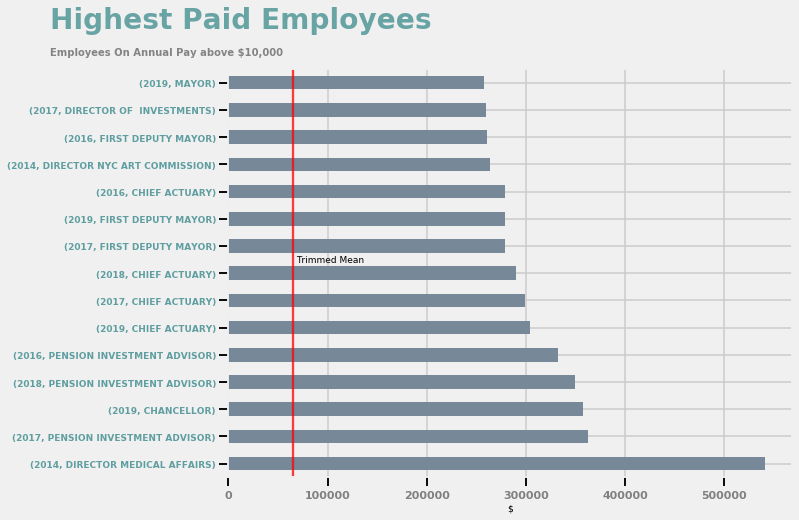

In [408]:
# Visualization for highest paid employees

x.groupby(["Fiscal Year","Title Description"])["Regular Gross Paid"].mean().sort_values(ascending=False)[:15].plot(kind="barh",color="lightslategray")
plt.xticks(fontsize=11, weight= "bold",rotation=0, color="gray")
plt.yticks(fontsize=9.0, weight="bold",color="cadetblue")
plt.ylabel('')
plt.xlabel('$',fontsize=9)
plt.rcParams['figure.figsize']= 9,7
plt.text(x=-180000, y=16, s="Highest Paid Employees", fontsize=28, color="cadetblue",weight="bold",alpha=.93)
plt.text(x=-180000, y=15, s="Employees On Annual Pay above $10,000",weight="bold", fontsize=10, alpha=.45)
plt.axvline(x=(stats.trim_mean(x["Regular Gross Paid"].values, 0.1)), color="red", linewidth=2.3, alpha=.75)
plt.annotate("Trimmed Mean",fontsize=9,xy=(90000,7.3), xytext=(68000,7.4), arrowprops=dict(arrowstyle='<-',facecolor="red",connectionstyle="arc3"))
plt.savefig('output/highest_Paid_employees.png')

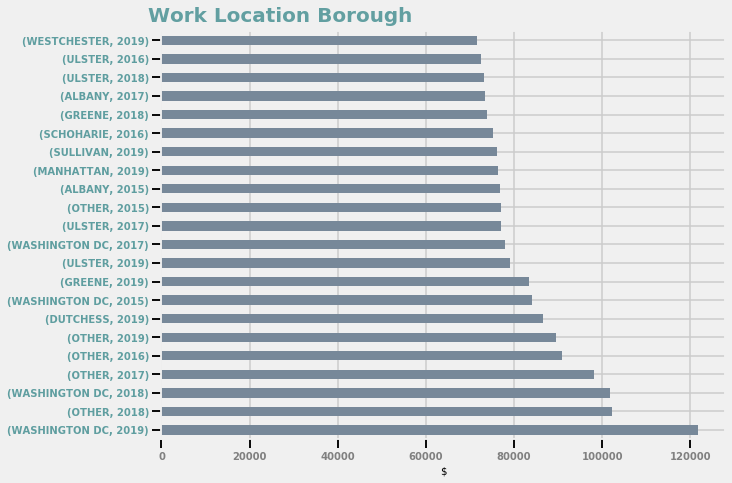

In [407]:
x.groupby(["Work Location Borough", "Fiscal Year"])["Regular Gross Paid"].mean().sort_values(ascending=False)[:22].plot(kind='barh',color='lightslategray')
plt.xticks(fontsize=10, color="gray", weight="bold")
plt.yticks(fontsize=10, color="cadetblue",weight="bold")
plt.ylabel('')
plt.xlabel('$',fontsize=10)
plt.rcParams['figure.figsize']= 9,7
plt.text(x=-3000, y=22, s="Work Location Borough", fontsize=20, weight="bold",color="cadetblue",alpha=.98)
plt.savefig('output/Work_Location_Borough.png')

In [193]:
#Agency Subtotals and visualization
#payroll_data["Agency Name"].value_counts()
payroll_data_agency = payroll_data.groupby("Agency Name").count()
payroll_data_agency



,Fiscal Year,Payroll Number,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,"(Base Salary, Regular Gross Paid)","(Base Salary, Regular Gross Paid, Total OT Paid, Total Other Pay)"
Agency Name,,,,,,,,,,,,,,,,,,
ADMIN FOR CHILDREN'S SVCS,44634,22685,44634,44634,28677,44634,38007,44634,44634,44634,44634,44634,44634,44634,44634,44634,44634,44634
ADMIN TRIALS AND HEARINGS,4237,2117,4237,4237,2501,4237,3605,4237,4237,4237,4237,4237,4237,4237,4237,4237,4237,4237
BOARD OF CORRECTION,137,71,137,137,82,137,137,137,137,137,137,137,137,137,137,137,137,137
BOARD OF CORRECTIONS,17,17,17,17,8,17,0,17,17,17,17,17,17,17,17,17,17,17
BOARD OF ELECTION,6378,2957,6378,6378,3454,6378,5388,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378
BOARD OF ELECTION POLL WORKERS,204209,103150,204208,204204,102815,204209,170968,204209,204209,204209,204209,204209,204209,204209,204209,204209,204209,204209
BOROUGH PRESIDENT-BRONX,372,184,372,372,195,372,312,372,372,372,372,372,372,372,372,372,372,372
BOROUGH PRESIDENT-BROOKLYN,490,235,490,490,249,490,403,490,490,490,490,490,490,490,490,490,490,490
BOROUGH PRESIDENT-QUEENS,422,208,422,422,199,422,349,422,422,422,422,422,422,422,422,422,422,422


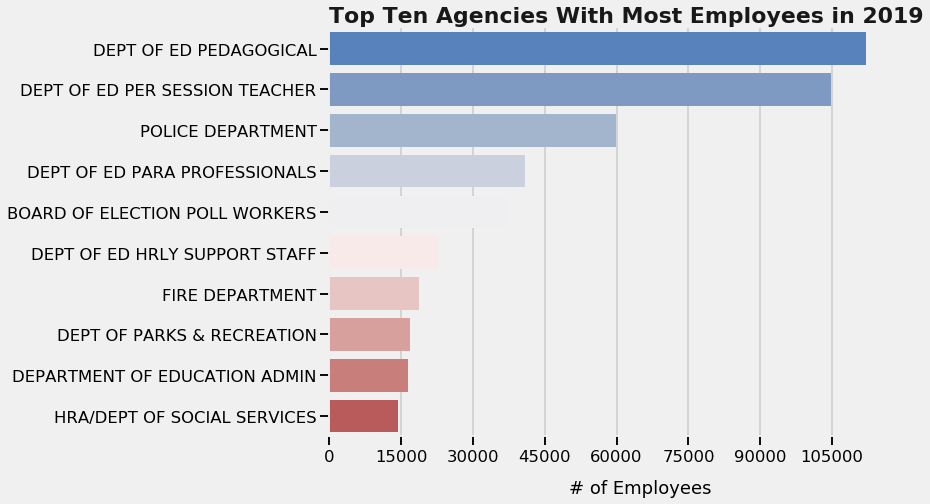

In [416]:
## 2019 Agencies with most employes
x1 = payroll_data1[payroll_data1["Fiscal Year"] == 2019]["Agency Name"].value_counts().sort_values(ascending=False)[0:10].values
y1 = payroll_data1[payroll_data1["Fiscal Year"] == 2019]["Agency Name"].value_counts().sort_values(ascending=False)[0:10].index
plt.rcParams["figure.figsize"]= 9,7
ax1 = sb.barplot(x=x1, y=y1, palette="vlag", saturation=1)
ax1.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
sb.set_context("talk", font_scale=1.0)
sb.despine()
fontz = {"fontsize":22, "fontweight": "bold"}
ax1.set_title('Top Ten Agencies With Most Employees in 2019',loc="left",fontdict=fontz, alpha=.90)
plt.text(x = 50000,y = 10.88, s="# of Employees")
plt.savefig('output/2019_Agencies_w_most employes.png')

In [ ]:
 #Could use a for loop or create a function to make this data... as well as for plotting
### Data 2014 plot
x1 = df[df["Fiscal Year"] == 2014]["Agency Name"].value_counts().sort_values(ascending=False)[0:8].values
y1 = df[df["Fiscal Year"] == 2014]["Agency Name"].value_counts().sort_values(ascending=False)[0:8].index
### Data 2015 plot
x2 = df[df["Fiscal Year"] == 2015]["Agency Name"].value_counts().sort_values(ascending=False)[0:8].values
y2 = df[df["Fiscal Year"] == 2015]["Agency Name"].value_counts().sort_values(ascending=False)[0:8].index
### Data 2016 Plot
x3 = df[df["Fiscal Year"] == 2016]["Agency Name"].value_counts().sort_values(ascending=False)[0:8].values
y3 = df[df["Fiscal Year"] == 2016]["Agency Name"].value_counts().sort_values(ascending=False)[0:8].index
### Data 2017 plot
x4 = df[df["Fiscal Year"] == 2017]["Agency Name"].value_counts().sort_values(ascending=False)[0:8].values
y4 = df[df["Fiscal Year"] == 2017]["Agency Name"].value_counts().sort_values(ascending=False)[0:8].index
   # Plot 
fig = plt.figure(figsize=(12,9))
ax0 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
 # titles 
fig.suptitle("Top 8 Agencies with most employees in...",fontweight='bold', fontsize=22)
ax0.title.set_text('2014')
ax2.title.set_text('2015')
ax3.title.set_text('2016')
ax4.title.set_text('2017')

sb.barplot(x=x1, y=y1, palette='BuGn_d', saturation=1, ax=ax0)
sb.barplot(x=x2, y=y2, palette='Blues_d', saturation=1, ax=ax2)
sb.barplot(x=x3, y=y3, palette='GnBu_d', saturation=1, ax=ax3)
sb.barplot(x=x4, y=y4, palette='RdBu_d', saturation=1, ax=ax4)
#plt.tight_layout(w_pad=1.1)
plt.subplots_adjust(left=.05, right=.95,hspace=.5, wspace=1.4,top=.85)
plt.text(x=80000, y=10.87, s='Justin Nunez    Source: Kaggle', fontsize=11, color='#f0f0f0',backgroundcolor='grey')
plt.show()

In [ ]:
# New DataFrame With only values greater then 20,000 on per Annum Basis.
x = df[(df["Pay Basis"] == "per Annum") & (df["Regular Gross Paid"] > 20000) & (df["Base Salary"] > 20000)]

# Regular Gross Pay Plot
x.groupby(x["Fiscal Year"])['Regular Gross Paid'].median().plot(linewidth=4,c='g')
x.groupby(x["Fiscal Year"])['Regular Gross Paid'].mean().plot(linewidth=4, c='b')
plt.axhline(y=50000, color='black', linewidth=1.3, alpha=.75)
plt.xlim(left=2014, right=2016)
plt.text(x=2013.9, y=74000, s="Regular Gross Pay", fontsize=28, weight='bold',alpha=.93)
plt.text(x=2013.9, y=72600, s="Employees On Annual Pay above $20,000",fontsize=12,alpha=.75)
plt.text(x=2013.9, y=42000, s='Justin Nunez    Source: Kaggle', fontsize=11, color='#f0f0f0',backgroundcolor='grey')
plt.text(x=2016.2, y=65400, s="Median", color='g', weight='bold', rotation=7)
plt.text(x=2015.5, y=67500, s="Mean", color='b', weight='bold', rotation=7)
plt.xticks(range(2014,2018,1), fontsize=14, weight= 'bold')
([<matplotlib.axis.XTick at 0x7f12c55d52b0>,

In [ ]:
# Base Salary Plot

x.groupby(x["Fiscal Year"])['Base Salary'].median().plot(linewidth=4,c='g')
x.groupby(x["Fiscal Year"])['Base Salary'].mean().plot(linewidth=4,c='b')
plt.axhline(y=50000, color='black', linewidth=1.3, alpha=.75)
plt.xlim(left=2014, right=2016)
plt.text(x=2013.9, y=75000, s="Base Salary", fontsize=26, weight='bold',alpha=.90)
plt.text(x=2013.9, y=73800, s="Employees On Annual Pay above $20,000",fontsize=12,alpha=.75)
plt.text(x=2013.9, y=42000, s='Justin Nunez    Source: Kaggle', fontsize=11, color='#f0f0f0',backgroundcolor='grey')
plt.text(x=2014, y=70600, s="Median", color='g', weight='bold', rotation=7)
plt.text(x=2014, y=67600, s="Mean", color='b', weight='bold', rotation=7)
plt.xticks(range(2014,2018,1), fontsize=14, weight= 'bold')

In [ ]:
b = x[x["Fiscal Year"]==2014]
b.groupby(["Work Location Borough"])["Regular Gross Paid"].mean().sort_values(ascending=False)[:8].plot(kind='bar',color='darkcyan')
plt.xticks(fontsize=14, weight= 'bold',rotation=0, color='black')
plt.text(x=-.8, y=84000, s="Top 4 Boroughs with Highest Average Gross Pay in 2014", fontsize=26, weight='bold',alpha=.90)
plt.text(x=-.8, y=79600, s="Employees On Annual Pay above $20,000",fontsize=12,alpha=.75)
plt.xlabel('')
plt.axhline(y=b["Regular Gross Paid"].mean(), color='black', linewidth=1.3, alpha=.75)
plt.text(x = 2.5, y = (b["Regular Gross Paid"].mean() + 240), s="Average Gross Pay")

In [ ]:
# Top 8 Boroughs with Highest Average Gross Pay 2015 Plot !
l = x[x["Fiscal Year"]==2015]
l.groupby(["Work Location Borough"])["Regular Gross Paid"].mean().sort_values(ascending=False)[:8].plot(kind='bar',color='darkcyan')
plt.xticks(fontsize=7.4, weight= 'bold',rotation=0, color='black')
plt.text(x=-.8, y=98000, s="Top 8 Boroughs with Highest Average Gross Pay in 2015", fontsize=26, weight='bold',alpha=.90)
plt.text(x=-.8, y=92900, s="Employees On Annual Pay above $20,000",fontsize=12,alpha=.75)
plt.xlabel('')
plt.axhline(y=l["Regular Gross Paid"].mean(), color='black', linewidth=1.3, alpha=.75)
plt.text(x = 2.5, y = (l["Regular Gross Paid"].mean() + 240), s="Average Gross Pay", fontsize=8.6)

In [ ]:
# # Top 8 Boroughs with Highest Average Gross Pay 2016 Plot !
lg= x[x["Fiscal Year"]==2016]
lg.groupby(["Work Location Borough"])["Regular Gross Paid"].mean().sort_values(ascending=False)[:8].plot(kind='bar',color='darkcyan')
plt.xticks(fontsize=7.4, weight= 'bold',rotation=0, color='black')
plt.text(x=-.8, y=109000, s="Top 8 Boroughs with Highest Average Gross Pay in 2016", fontsize=26, weight='bold',alpha=.90)
plt.text(x=-.8, y=105000, s="Employees On Annual Pay above $20,000",fontsize=10,alpha=.75)
plt.xlabel('')
plt.axhline(y=lg["Regular Gross Paid"].mean(), color='black', linewidth=1.3, alpha=.75)
plt.text(x = 2.5, y = (lg["Regular Gross Paid"].mean() + 240), s="Average Gross Pay", fontsize=8.6)

In [ ]:
# # Top 8 Boroughs with Highest Average Gross Pay 2017 Plot !
mg= x[x["Fiscal Year"]==2017]
mg.groupby(["Work Location Borough"])["Regular Gross Paid"].mean().sort_values(ascending=False)[:8].plot(kind='bar',color='darkcyan')
plt.xticks(fontsize=7.4, weight= 'bold',rotation=0, color='black')
plt.text(x=-.8, y=117000, s="Top 8 Boroughs with Highest Average Gross Pay in 2017", fontsize=26, weight='bold',alpha=.90)
plt.text(x=-.8, y=112000, s="Employees On Annual Pay above $20,000",fontsize=10,alpha=.75)
plt.xlabel('')
plt.axhline(y=mg["Regular Gross Paid"].mean(), color='black', linewidth=1.3, alpha=.75)
plt.text(x = 2.3, y = (mg["Regular Gross Paid"].mean() + 240), s="Average Gross Pay", fontsize=9.5)

In [ ]:
### --- Distributions ---- ###
## creation of subets. For each year.
from scipy.stats import norm
new = df[(df["Pay Basis"] == "per Annum") & (df["Regular Gross Paid"] > 10000) & (df["Base Salary"] > 10000)]
cc = new[new["Fiscal Year"]==2014]
dd = new[new["Fiscal Year"]==2015]
ee = new[new["Fiscal Year"]==2016]
ff = new[new["Fiscal Year"]==2017]

# Year 2017 Distribution    (too lazy to add title)
sb.set_context("paper")
sb.distplot(ff["Regular Gross Paid"],fit=norm,kde=False)
#sb.set(xticks=np.arange(0,250000,50000))
plt.xlim(left=0, right=200000)
plt.title('Distribution of Gross Pay 2017')
plt.text(x=100000, y=.000013, s="Sub-set of employees with salary above 10000", fontsize=8,alpha=.65)

In [ ]:
# Year 2017 Distribution    
sb.set_context("paper")
sb.distplot(ff["Base Salary"],fit=norm,kde=False)
#sb.set(xticks=np.arange(0,250000,50000))
plt.xlim(left=0, right=200000)
plt.title('Distribution of Base Salary 2017')
plt.text(x=100000, y=.000017, s="Sub-set of employees with salary above 10000", fontsize=8,alpha=.65)

In [ ]:
# Distribution of Base Salary for Annual Employees making over 10,000
fig1 = plt.figure(figsize=(12,9))
ax6 = fig1.add_subplot(221)
ax7 = fig1.add_subplot(222)
ax8  = fig1.add_subplot(223)
ax9 = fig1.add_subplot(224)
 # titles 
fig1.suptitle("Base Salary Distribution (Salary > $10,000) in...",fontweight='bold', fontsize=22)
ax6.title.set_text('2014')
ax7.title.set_text('2015')
ax8.title.set_text('2016')
ax9.title.set_text('2017')
sb.distplot(cc["Base Salary"],kde=False, ax=ax6)
sb.distplot(dd["Base Salary"],kde=False, ax=ax7)
sb.distplot(ee["Base Salary"],kde=False, ax=ax8)
sb.distplot(ff["Base Salary"],kde=False, ax=ax9)
plt.subplots_adjust(left=.05, right=.95,hspace=.5, wspace=.35,top=.85)
plt.xlim(left=0, right=200000)
plt.text(x=-5000, y=-15000, s='Justin Nunez    Source: Kaggle', fontsize=9, color='#f0f0f0',backgroundcolor='grey')
# WONT RUN if I take out the "kde=False" paramter in the 4th distplot, so thats why its not on the 2017 graph.

In [ ]:
# Distribution of Base Salary for Annual Employees making over 10,000
fig1 = plt.figure(figsize=(12,9))
ax6 = fig1.add_subplot(221)
ax7 = fig1.add_subplot(222)
ax8  = fig1.add_subplot(223)
ax9 = fig1.add_subplot(224)
 # titles 
fig1.suptitle("Base Salary Distribution (Salary > $10,000) in...",fontweight='bold', fontsize=22)
ax6.title.set_text('2014')
ax7.title.set_text('2015')
ax8.title.set_text('2016')
ax9.title.set_text('2017')
sb.distplot(cc["Base Salary"],fit=norm,kde=False, ax=ax6)
ax6.set_xlim(0,185000)
ax7.set_xlim(0,185000)
ax8.set_xlim(0,185000)
ax9.set_xlim(0,185000)
sb.distplot(dd["Base Salary"],fit=norm,kde=False, ax=ax7)
plt.xlim(left=0, right=200000)
sb.distplot(ee["Base Salary"],fit=norm,kde=False, ax=ax8)
plt.xlim(left=0, right=200000)
sb.distplot(ff["Base Salary"], kde=False, ax=ax9)
plt.subplots_adjust(left=.05, right=.95,hspace=.5, wspace=.35,top=.85)
#plt.xlim(left=0, right=175000)
plt.text(x=-5000, y=-15000, s='Justin Nunez    Source: Kaggle', fontsize=9, color='#f0f0f0',backgroundcolor='grey')
# WONT RUN if I take out the "kde=False" paramter in the 4th distplot, so thats why its not on the 2017 graph.

In [ ]:
# distribution of Gross Pay in 2014.
sb.kdeplot(new["Regular Gross Paid"], shade=True, color="r",clip=(0,240000))
# new.describe() # Shows that 541,544.90 is Max Salary.

In [ ]:
# histogram of 2017 Gross Pay 
ax5 = plt.subplot(111)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
#ax5.get_xaxis().tick_bottom()
#ax5.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.text(x=1000, y= 21000, s="Distribution of Gross Pay in 2017", fontsize=27, fontweight='bold')
plt.hist(list(ff["Regular Gross Paid"].values), color="#3F5D7D", bins=100)

## Tumor Response to Treatment

In [ ]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vols_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

# Flatten the column headings
tumor_vols_mean = tumor_vols_mean.reset_index()

# Preview DataFrame
tumor_vols_mean

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vols_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)

# Preview DataFrame
tumor_vols_sem.head().reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_vols_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


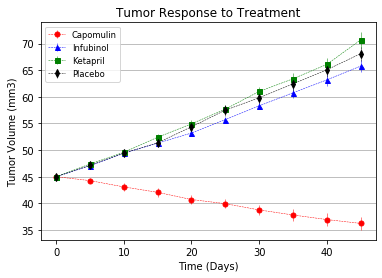

In [15]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Fig1.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
met_sites_mean = pd.DataFrame(met_sites_mean)

# Preview DataFrame
met_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
met_sites_sem = pd.DataFrame(met_sites_sem)

# Preview DataFrame
met_sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()
met_sites_pivot_sem = met_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_sites_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


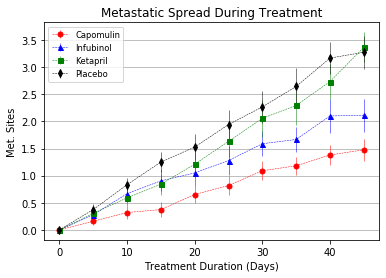

In [16]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Capomulin"], yerr=met_sites_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Infubinol"], yerr=met_sites_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ketapril"], yerr=met_sites_pivot_sem["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Placebo"], yerr=met_sites_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Fig2.png")

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = clinical_data_complete.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


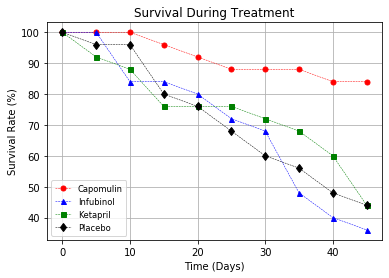

In [17]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Fig3.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0]) / tumor_vols_pivot_mean.iloc[0]
tumor_pct_change_sem =  100 * (tumor_vols_pivot_sem.iloc[-1] - tumor_vols_pivot_sem.iloc[0]) / tumor_vols_pivot_sem.iloc[0]

# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

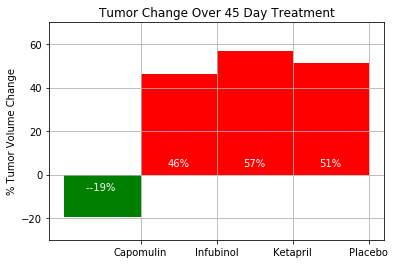

In [14]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"], 
               tumor_pct_change["Infubinol"], 
               tumor_pct_change["Ketapril"], 
               tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("analysis/Fig4.png")

# Show the Figure
fig.show()